In [702]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import math
from scipy.spatial import ConvexHull, convex_hull_plot_2d

%matplotlib inline

# Detection of a black picture

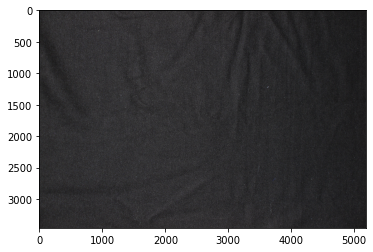

In [703]:
imgblack0 = cv2.imread('./_data/categorized/black/IMG_1141.JPG')
plt.imshow(imgblack0)

In [704]:
rows, cols, ch = imgblack0.shape

print(rows, cols)
for y in range(int(rows/4), rows, int(rows/4)):
    for x in range(int(cols/4), cols, int(cols/4)):
        print(x, y, imgblack0[y, x])

3456 5184
1296 864 [49 48 50]
2592 864 [54 54 54]
3888 864 [39 38 42]
1296 1728 [45 41 47]
2592 1728 [44 39 48]
3888 1728 [54 54 54]
1296 2592 [50 49 51]
2592 2592 [48 47 51]
3888 2592 [45 50 41]


In [705]:
plt.imshow(img3)

rows, cols, ch = img3.shape

for y in range(int(rows/4), rows, int(rows/4)):
    for x in range(int(cols/4), cols, int(cols/4)):
        print(x, y, img3[y, x])
        


NameError: name 'img3' is not defined

In [ ]:
def isBlack(img):
    rows, cols, ch = img.shape
    sumb = sumt = 0
    div = 10
    for y in range(int(rows/div), rows, int(rows/div)):
        for x in range(int(cols/div), cols, int(cols/div)):
            rgb = img[y, x]
            if rgb[0] < 100 and rgb[1] < 100 and rgb [2] < 100:
                sumb += 1
            sumt += 1
    return 1.0 * sumb / sumt > 0.9

print("mainly white:", isBlack(img3))
print("white in the middle:", isBlack(img0))
print("mainly black:", isBlack(imgblack0))

In [ ]:
import os


paths = ['./_data/categorized/black',
         './_data/categorized/simple']

for path in paths:
    print("\n", path, ": ")
    for imgfile in os.listdir(path):
        if imgfile[-4:].lower() != ".jpg":
            continue
        im = cv2.imread(os.path.join(path, imgfile))
        print(isBlack(im), " ", end='')
        


# Build PDF file

In [1]:
#bytes = img2pdf("./_data/canon/IMG_1052.JPG", dpi=150)

import img2pdf

path = './_data/categorized/simple'
images = os.listdir(path)
images = [os.path.join(path, i) for i in images]
print(images)


with open("tempo.pdf", "wb") as f:
    f.write(img2pdf.convert(images))

#pdf_bytes = img2pdf.convert(images, dpi=25)
#file = open("name.pdf","wb")
#file.write(pdf_bytes)
#file.close()

#print help(img2pdf.convert)

NameError: name 'os' is not defined

# Build a new image

In [ ]:
imgts0 = cv2.imread('./_data/raw/titre sejour/1.jpg')
imgts0 = rotateAboutCenter(imgts0, 90, scale=1.)
plt.imshow(imgts0)

imgts0.shape

In [ ]:
imgts1 = cv2.imread('./_data/raw/titre sejour/2.jpg')
imgts1 = rotateAboutCenter(imgts1, 90, scale=1.)
plt.imshow(imgts1)

imgts1.shape

Create an empty "white" image:

In [706]:
# Dimension of the card in cm
tsYmm, tsXmm = 54, 85
# Dimension of the scan of the card in mm
tsYpx, tsXpx, ch = imgts0.shape
# Dimension of an A4 page in mm
a4Ymm, a4Xmm = 297, 210

# Dimension of an A4 page matching the definition of the scan of the card.
a4Xpx = a4Xmm * int(tsXpx/tsXmm)
a4Ypx = a4Ymm * int(tsXpx/tsXmm)

print(a4Xpx, a4Ypx)

img = np.empty(a4Xpx*a4Ypx*3,
               dtype=int).reshape(a4Ypx,
                                  a4Xpx, 3)
img.fill(254)
plt.imshow(img)


NameError: name 'imgts0' is not defined

In [707]:
# Add first image in the middle of the top half
y0 = int(a4Ypx/4 - tsYpx/2)
x0 = int(a4Xpx/2 - tsXpx/2)
img[y0:y0+imgts0.shape[0], x0:x0+imgts0.shape[1], 0:3] = imgts0

# Add second image in the middle of the bottom half
y1 = int(3*a4Ypx/4 - tsYpx/2)
img[y1:y1+imgts1.shape[0], x0:x0+imgts1.shape[1], 0:3] = imgts1

plt.imshow(img)
cv2.imwrite('titresejour.jpg', img)

NameError: name 'a4Ypx' is not defined

In [708]:
pdf_bytes = img2pdf.convert(["titresejour.jpg"], dpi=25)

file = open("titre sejour.pdf","wb")
file.write(pdf_bytes)
file.close()


NameError: name 'img2pdf' is not defined